 # Variational Quantum Classifier su Dataset IRIS
- Il dataset IRIS
- Classificazione con Decision Tree (classico)
- Variational QUantum Classifier per IRIS

# The Iris Dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr


https://en.wikipedia.org/wiki/File:Mature_flower_diagram.svg

In [4]:
features = iris_data.data
labels = iris_data.target
print(features[:10])
print(labels[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


## Normalizziamo le features del dataset

In [6]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)
features[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

## Visualizziamo il dataset per coppie di features

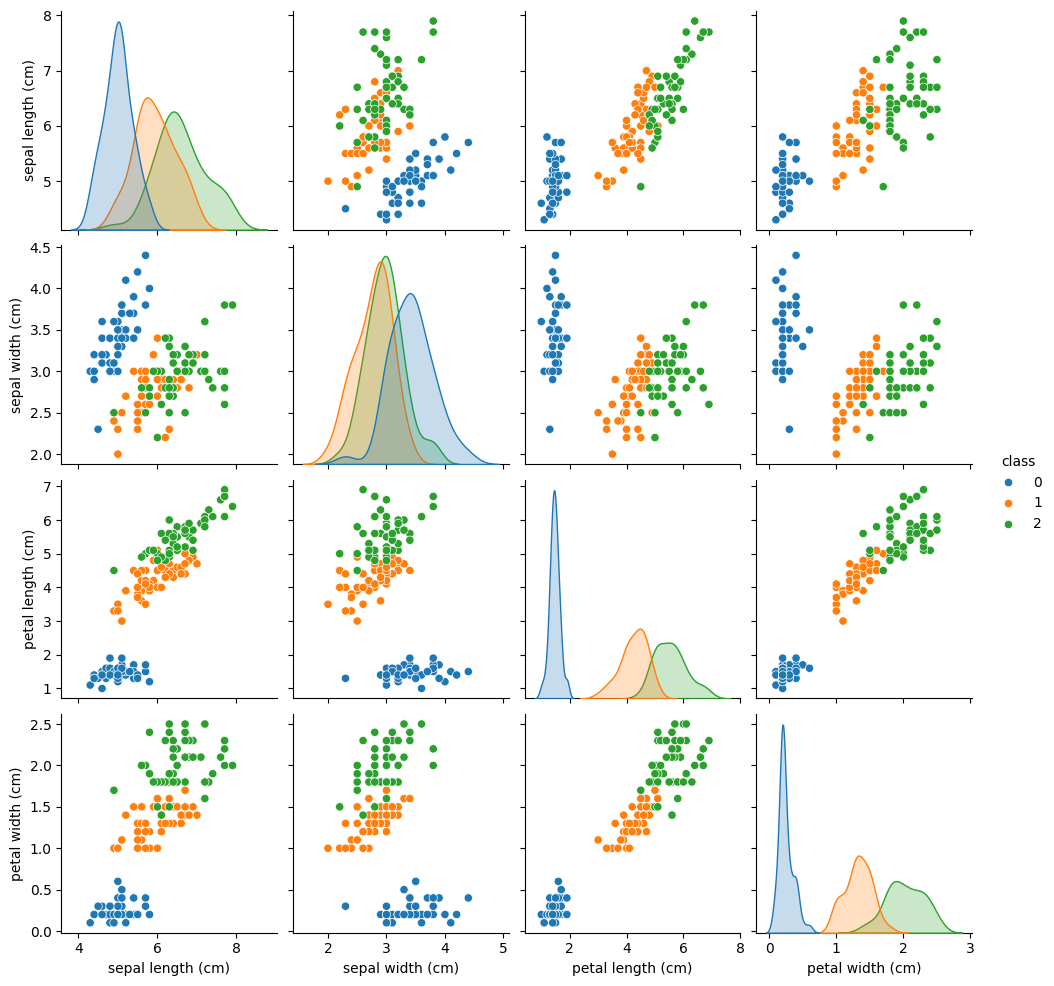

In [7]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")

## Dividiamo il dataset in training set e test set. Il primo è utilizzato per addestrare il classificatore, il secondo per valutarlo.

In [13]:
from sklearn.model_selection import train_test_split



train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=123
)

print(f"Train (f,l): {len(train_features)}, {len(train_labels)}")
print(f"Test (f,l): {len(test_features)}, {len(test_labels)}")

Train (f,l): 120, 120
Test (f,l): 30, 30


## Proviamo un classificatore "classico": Decision Tree (alberi di decisione)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc=DecisionTreeClassifier()
dtc.fit(train_features,train_labels)

DecisionTreeClassifier()

## Valutiamo il classificatore

In [17]:
train_predictions=dtc.predict(train_features)
test_predictions=dtc.predict(test_features)
train_predictions

array([2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0,
       0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2,
       1, 1, 2, 2, 1, 0, 1, 1, 2, 2])

In [18]:
from sklearn.metrics import accuracy_score
print(f"train accuracy: {accuracy_score(train_labels,train_predictions)}")
print(f"test accuracy: {accuracy_score(test_labels,test_predictions)}")

train accuracy: 1.0
test accuracy: 0.9333333333333333


# Quantum Variational Classiffier

## a) Quantum circuit per Feature encoding

(150, 4)


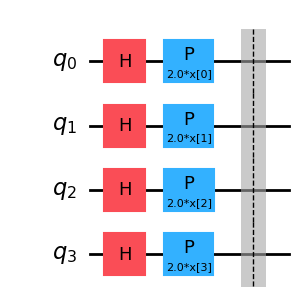

In [19]:
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap

print(features.shape)
num_features = features.shape[1]


#feature_map = PauliFeatureMap(feature_dimension=num_features, reps=1)
#feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map = ZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.barrier()
feature_map.decompose().draw(output="mpl", fold=20)

## b) Quantum circuit per Ansatz

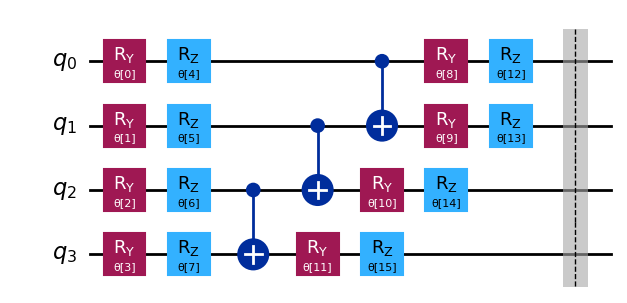

In [20]:
from qiskit.circuit.library import RealAmplitudes, TwoLocal, EfficientSU2


#ansatz=TwoLocal(num_features, 'ry', 'cx', 'reverse_linear', reps=3)
ansatz=EfficientSU2(num_features,reps=1)
ansatz.barrier()
ansatz.decompose().draw(output="mpl", fold=20)

#ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
#ansatz.decompose().draw(output="mpl", fold=20)



-----------------------------------------------------


## Combiniamo il tutto ed eseguiamo l'algoritmo Variational Quantum Classifier

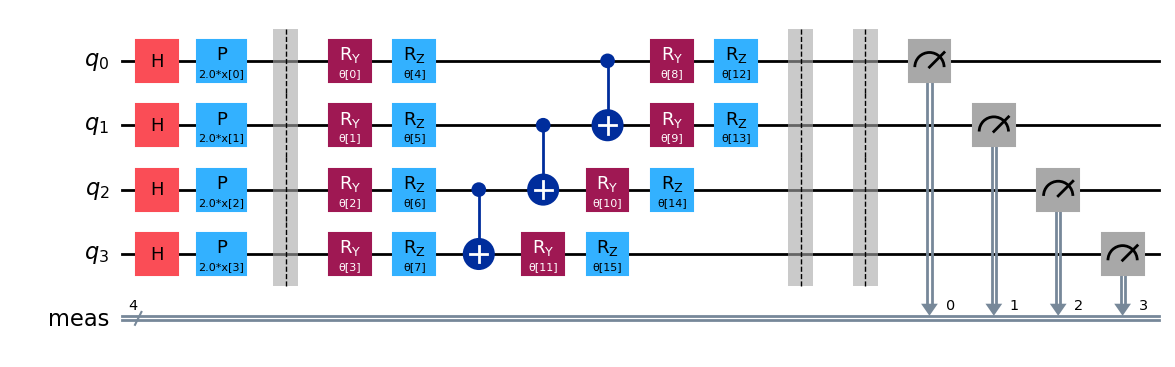

In [23]:

ad_hoc_circuit=feature_map.compose(ansatz)
ad_hoc_circuit.measure_all()
ad_hoc_circuit.decompose().draw(output="mpl", style="iqp")

In [24]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

history=[]
def init_history():
    history.clear()


objective_func_vals = []
def init_graph():
    plt.rcParams["figure.figsize"] = (12, 6)
    objective_func_vals = []
    clear_output(wait=True)


def callback_graph(obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [26]:
#log_loss equivalente a cross-entropy
from sklearn.metrics import log_loss, accuracy_score
from qiskit.primitives import StatevectorSampler


def circuit_instance(tuple, variational):
    # tuple: una tupla
    # variational: parametri dell'ansatz (theta)
    parameters = {}
    for i, p in enumerate(feature_map.ordered_parameters):
        parameters[p] =tuple[i]
    for i, p in enumerate(ansatz.ordered_parameters):
        parameters[p] = variational[i]
    return ad_hoc_circuit.assign_parameters(parameters)


def interpreter(bitstring):
    hamming_weight = sum(int(k) for k in list(bitstring))
    return (hamming_weight) % 3



def label_probability(results):
    shots = sum(results.values())
     #probabilities = {0: 0, 1: 0}
    probabilities = {0: 0, 1: 0, 2: 0}
    for bitstring, counts in results.items():
        label = interpreter(bitstring)
        probabilities[label] += counts / shots
    return probabilities




def classification_probability(data, variational):
    circuits = [circuit_instance(tupla, variational) for tupla in data]
    sampler = StatevectorSampler()
    results = sampler.run(circuits).result()
    classification = [
        label_probability(results[i].data.meas.get_counts()) for i, c in enumerate(circuits)]
    #print(classification)
    return classification


def cost_function(data, labels, variational):
    classifications = classification_probability(data, variational)
    cost=log_loss(y_true=labels,y_pred=[[p[0],p[1],p[2]] for p in classifications])
    history.append(cost)
    callback_graph(cost)
    print(cost)
    return cost


def objective_function(variational):
    return cost_function(train_features, train_labels, variational)

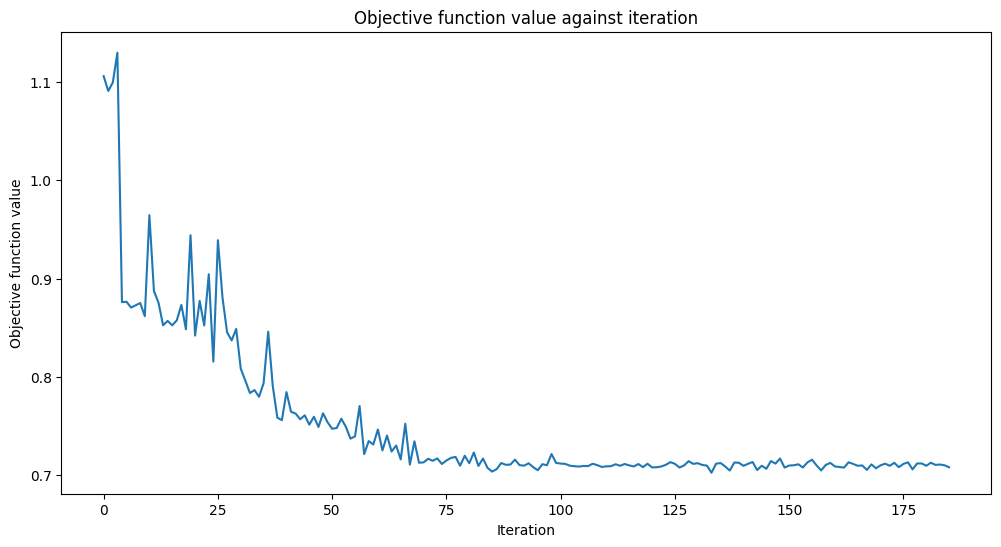

0.7078993610679413


In [27]:
import numpy as np
from scipy.optimize import minimize

init_history()
init_graph()
initial_point = np.zeros((ansatz.num_parameters))
res = minimize(objective_function, initial_point, method="cobyla", options={"maxiter":5000})


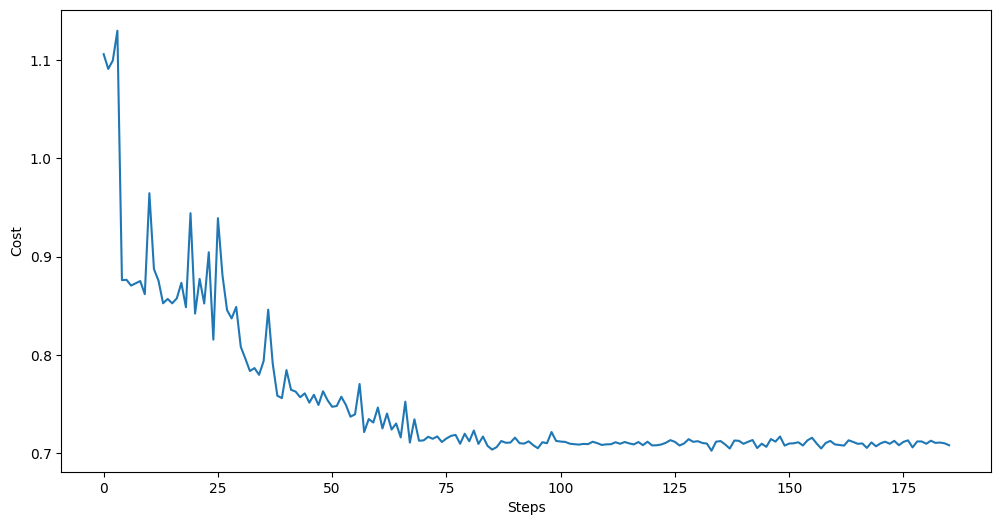

[ 1.65077154  1.3663023  -0.14561455  1.64118877  0.12647795  1.5380038
  0.28981395 -0.80129828  0.43296575 -0.16217319 -0.27191544 -0.34868068
  1.05629792  0.16964114  1.4188123   0.18125546]
0.7078993610679413


In [29]:
opt_var = res.x # migliori parametri della funzione obiettivo e quindi dell'ansatz
opt_value = res.fun # ultima valutazione della funzione obiettivo, nel nostro caso cross-entropy (log_loss)

fig = plt.figure()
plt.plot(history)
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()

print(opt_var)
print(opt_value)

In [30]:
def test_classifier(data, labels, variational):
    probability = classification_probability(data, variational)
    #print(probability)
    predictions= [max(p, key=p.get) for p in probability]
    accuracy = 0
    for i, prediction in enumerate(predictions):
        if prediction == labels[i]:
            accuracy += 1
    accuracy /= len(labels)
    return accuracy, predictions

accuracy_train, predictions_train = test_classifier(train_features, train_labels, opt_var)
accuracy_test, predictions_test = test_classifier(test_features, test_labels, opt_var)
print(accuracy_train,accuracy_test)

0.9 0.9


In [31]:
accuracy_train=accuracy_score(train_labels,predictions_train)
accuracy_test=accuracy_score(test_labels,predictions_test)
print(accuracy_train)
print(accuracy_test)

0.9
0.9


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,predictions_test)

array([[13,  0,  0],
       [ 1,  4,  1],
       [ 0,  1, 10]])

In [33]:
confusion_matrix(train_labels,predictions_train)

array([[37,  0,  0],
       [ 6, 35,  3],
       [ 0,  3, 36]])